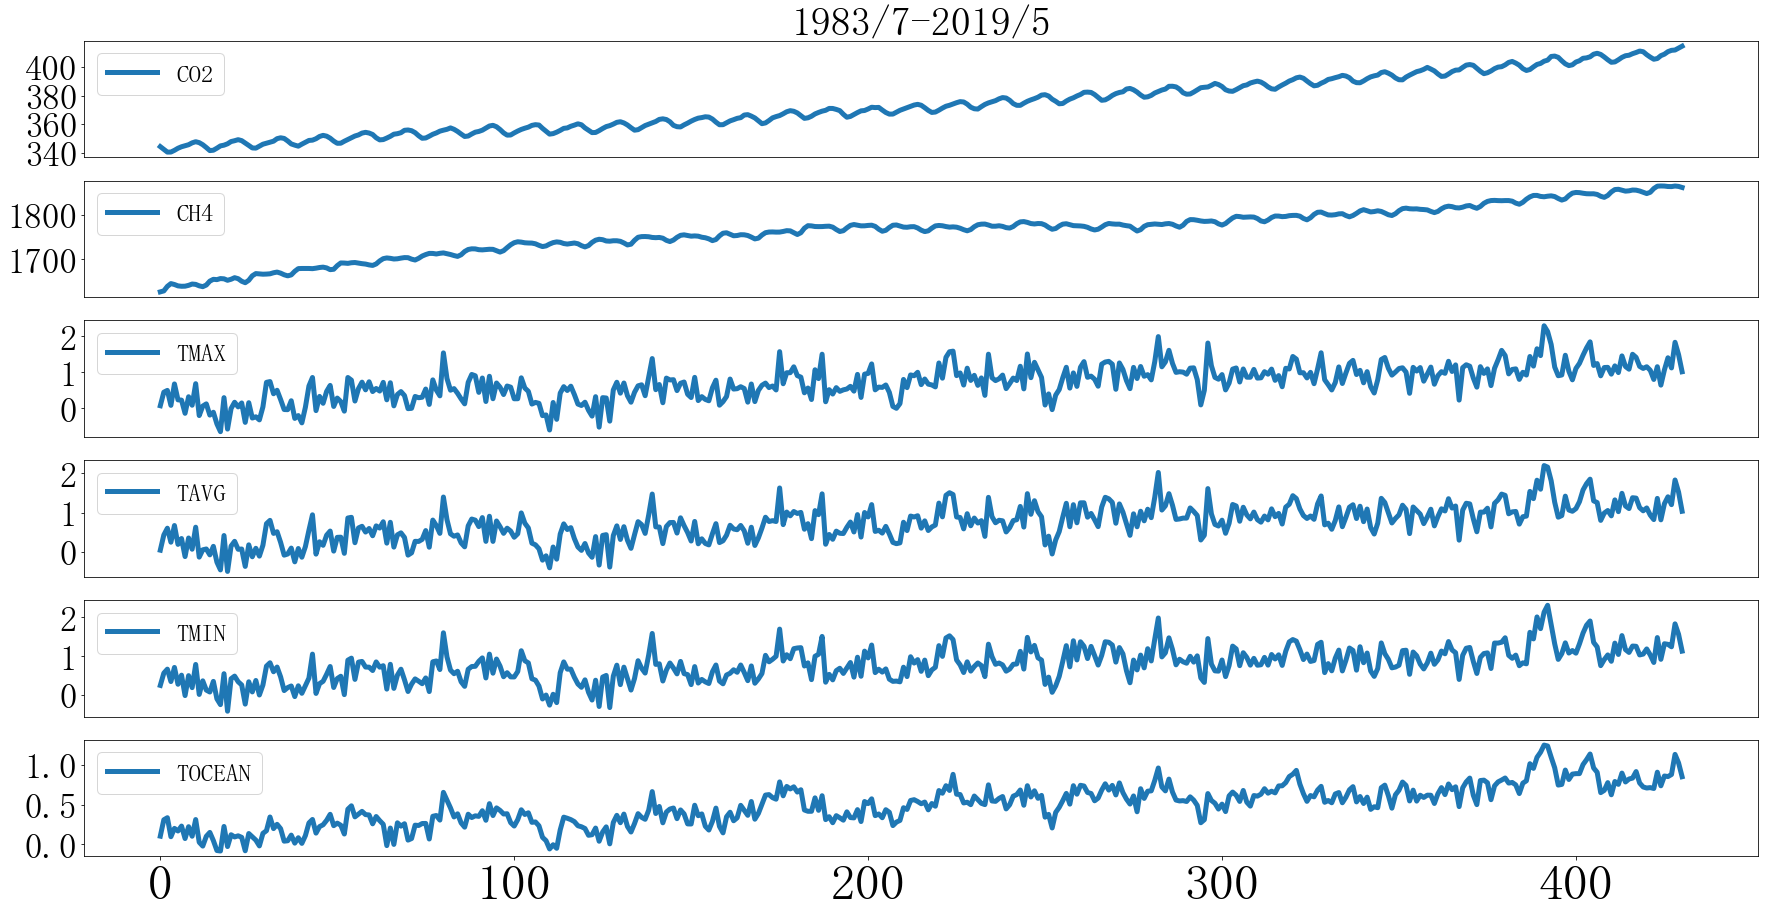

In [1]:
from pandas import read_csv
from matplotlib import pyplot
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline
# load dataset
dataset = read_csv('data.csv', header=0)
# print(dataset.values[:,0])

# month=dataset.values[:,0]
month=list(map(str,dataset.values[:,0]))
# print(month)
# print(type(month[0]))
values = dataset.values

# specify columns to plot
groups = list(range(1,len(dataset.columns)))
i = 1
# plot each column

start = datetime.datetime(1983, 7, 1)
end = datetime.datetime(2019, 5, 1)
# 设置日期的间隔为1
delta = datetime.timedelta(days=30.4)
 
# 生成一个matplotlib可以识别的日期对象
dates = mpl.dates.drange(start, end, delta)
# print(dates)

fig= pyplot.figure(figsize = (30,15))
for group in groups:
    
    plt.subplot(len(groups),1,i)
    i=i+1
    
    if i==2:
        plt.title("1983/7-2019/5",fontsize=40)
    if i!=len(groups)+1:
        plt.xticks([])
    else:
        pass
        
#         pyplot.plot(month,values[:, group])
#     else:
    plt.xticks(fontsize=50)
    plt.yticks(fontsize=35)

    pyplot.plot(values[:, group],linewidth=5,label=dataset.columns[group])
    plt.legend(prop={'size':25})
#     pyplot.title(dataset.columns[group], loc='center')
    
#     pyplot.xlabel("time")
#     pyplot.ylabel("value",fontsize=25)
#     pyplot.xticks(rotation=90,fontsize=4)

pyplot.savefig("truth.png",dpi=240)
#     pyplot.show()

In [2]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# 转换序列成监督学习问题
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
#     print(n_vars)
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

def series_to_supervised(data, n_in=1, n_out=1,y_columns=[0],dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
#     print(n_vars)
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df[y_columns].shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in y_columns]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# 加载数据集
dataset = read_csv('data.csv', header=0)
values = dataset.values[:,1:]
feature=values.shape[1]

# print(values)
# # 整数编码
# encoder = LabelEncoder()
# values[:,4] = encoder.fit_transform(values[:,4])
# # ensure all data is float
# values = values.astype('float32')

# 归一化特征
scaler = MinMaxScaler(feature_range=(0, 1,2,3,4))
scaled = scaler.fit_transform(values)
# scaled=values

# 构建监督学习问题
n_in=1
reframed = series_to_supervised(scaled, n_in, 1,y_columns=list(range(feature)))
print(reframed.head(5))
# 分割为训练集和测试集
values = reframed.values

n_train_hours = 300
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# 分为输入输出
train_X, train_y = train[:, :-feature], train[:, -feature:]
print(-values.shape[1])
test_X, test_y = test[:, :-feature], test[:, -feature:]
# 重塑成3D形状 [样例, 时间步, 特征]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

Using TensorFlow backend.


   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)  \
1   0.051675   0.000000   0.244801   0.200890   0.243947   0.140285  0.025838   
2   0.025838   0.009155   0.372656   0.344329   0.359868   0.294824  0.000000   
3   0.000000   0.052018   0.389703   0.408451   0.397285   0.314329  0.000404   
4   0.000404   0.078236   0.248210   0.276130   0.280264   0.135034  0.016687   
5   0.016687   0.069496   0.450733   0.433655   0.413426   0.213803  0.036334   

    var2(t)   var3(t)   var4(t)   var5(t)   var6(t)  
1  0.009155  0.372656  0.344329  0.359868  0.294824  
2  0.052018  0.389703  0.408451  0.397285  0.314329  
3  0.078236  0.248210  0.276130  0.280264  0.135034  
4  0.069496  0.450733  0.433655  0.413426  0.213803  
5  0.056596  0.300375  0.255374  0.254585  0.189047  
-12
(300, 1, 6) (300, 6) (130, 1, 6) (130, 6)


Train on 300 samples, validate on 130 samples
Epoch 1/300
 - 2s - loss: 0.3742 - val_loss: 0.6149
Epoch 2/300
 - 0s - loss: 0.3331 - val_loss: 0.5517
Epoch 3/300
 - 0s - loss: 0.2724 - val_loss: 0.4399
Epoch 4/300
 - 0s - loss: 0.1854 - val_loss: 0.2358
Epoch 5/300
 - 0s - loss: 0.1243 - val_loss: 0.1007
Epoch 6/300
 - 0s - loss: 0.1331 - val_loss: 0.1429
Epoch 7/300
 - 0s - loss: 0.1049 - val_loss: 0.2252
Epoch 8/300
 - 0s - loss: 0.1127 - val_loss: 0.2371
Epoch 9/300
 - 0s - loss: 0.1096 - val_loss: 0.1876
Epoch 10/300
 - 0s - loss: 0.1043 - val_loss: 0.1530
Epoch 11/300
 - 0s - loss: 0.1022 - val_loss: 0.1592
Epoch 12/300
 - 0s - loss: 0.0986 - val_loss: 0.1644
Epoch 13/300
 - 0s - loss: 0.0974 - val_loss: 0.1431
Epoch 14/300
 - 0s - loss: 0.0950 - val_loss: 0.1240
Epoch 15/300
 - 0s - loss: 0.0928 - val_loss: 0.1274
Epoch 16/300
 - 0s - loss: 0.0905 - val_loss: 0.1282
Epoch 17/300
 - 0s - loss: 0.0884 - val_loss: 0.1187
Epoch 18/300
 - 0s - loss: 0.0863 - val_loss: 0.1120
Epoch 19/

Epoch 154/300
 - 0s - loss: 0.0610 - val_loss: 0.0810
Epoch 155/300
 - 0s - loss: 0.0611 - val_loss: 0.0773
Epoch 156/300
 - 0s - loss: 0.0607 - val_loss: 0.0766
Epoch 157/300
 - 0s - loss: 0.0607 - val_loss: 0.0906
Epoch 158/300
 - 0s - loss: 0.0614 - val_loss: 0.0765
Epoch 159/300
 - 0s - loss: 0.0620 - val_loss: 0.0750
Epoch 160/300
 - 0s - loss: 0.0620 - val_loss: 0.0928
Epoch 161/300
 - 0s - loss: 0.0624 - val_loss: 0.0743
Epoch 162/300
 - 0s - loss: 0.0611 - val_loss: 0.0758
Epoch 163/300
 - 0s - loss: 0.0606 - val_loss: 0.0798
Epoch 164/300
 - 0s - loss: 0.0607 - val_loss: 0.0789
Epoch 165/300
 - 0s - loss: 0.0604 - val_loss: 0.0748
Epoch 166/300
 - 0s - loss: 0.0603 - val_loss: 0.0794
Epoch 167/300
 - 0s - loss: 0.0601 - val_loss: 0.0797
Epoch 168/300
 - 0s - loss: 0.0599 - val_loss: 0.0817
Epoch 169/300
 - 0s - loss: 0.0602 - val_loss: 0.0807
Epoch 170/300
 - 0s - loss: 0.0602 - val_loss: 0.0805
Epoch 171/300
 - 0s - loss: 0.0599 - val_loss: 0.0785
Epoch 172/300
 - 0s - loss: 

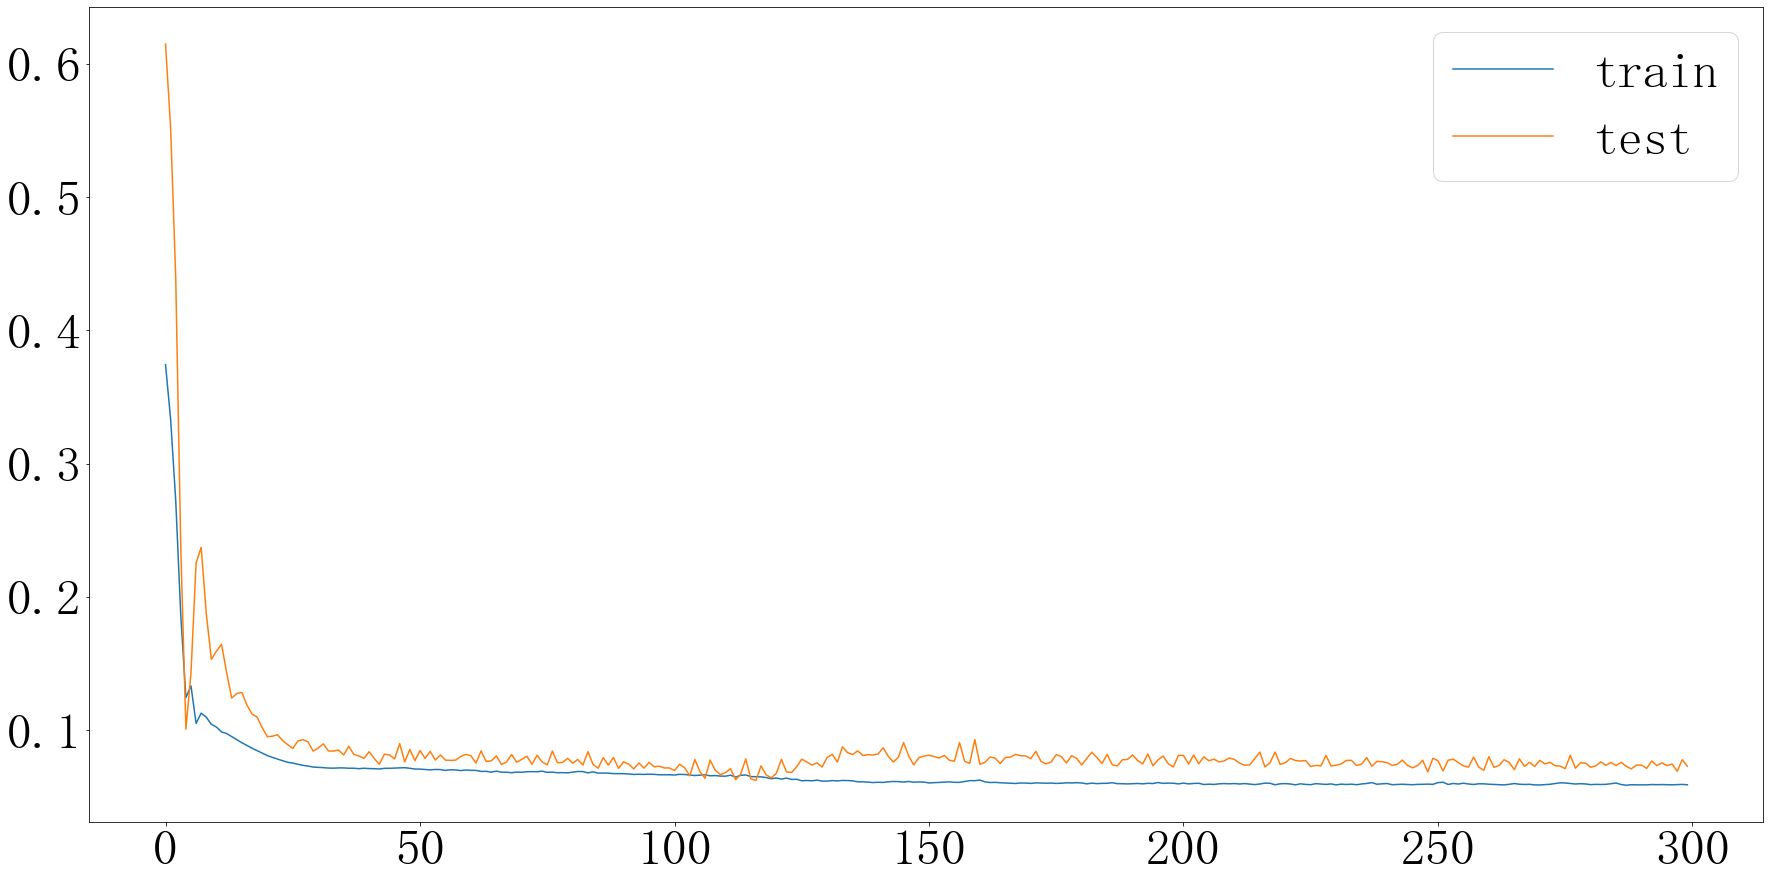

In [7]:
# 设计网络
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model.add(LSTM(200,return_sequences=True))
# model.add(LSTM(200,return_sequences=True))
model.add(LSTM(100,return_sequences=False))
model.add(Dense(100))
model.add(Dense(feature))
model.compile(loss='mae', optimizer='adam')
# 拟合神经网络模型
history = model.fit(train_X, train_y, epochs=300, batch_size=80, validation_data=(test_X, test_y), verbose=2, shuffle=True)

# 绘制训练测试误差图
fig= pyplot.figure(figsize = (30,15))
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.legend(prop={'size':50})

plt.savefig('loss.png')
pyplot.show()


In [4]:
# 做出预测
yhat = model.predict(test_X)

test_X1 = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# 反向转换预测值比例
# inv_yhat = concatenate((yhat, test_X1[:, 1:]), axis=1)

# inv_yhat = concatenate((yhat, test_X1[:, 2:]), axis=1)
inv_yhat=yhat
inv_yhat = scaler.inverse_transform(inv_yhat)
print(inv_yhat.shape)
# inv_yhat = inv_yhat[:,0]
# 反向转换实际值比例
test_y1 = test_y.reshape((len(test_y), len(groups)))
# inv_y = concatenate((test_y1, test_X1[:, 2:]), axis=1)
inv_y=test_y1
inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]


(130, 6)


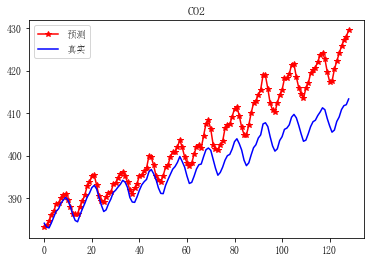

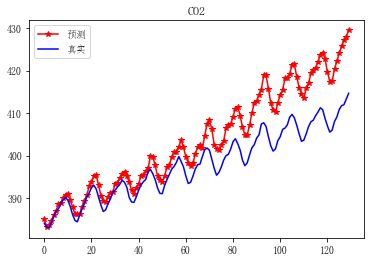

In [5]:
# 绘制历史数据和预测数据图
plt.plot(inv_yhat[1:,0],label='预测',c='r',linestyle='-', marker='*')
plt.plot(inv_y[:-1,0],label="真实",c='b')
plt.legend()
plt.title('CO2')
plt.show()


plt.plot(inv_yhat[:,0],label='预测',c='r',linestyle='-', marker='*')
plt.plot(inv_y[:,0],label="真实",c='b')
plt.legend()
plt.title('CO2')
plt.show()


Test RMSE: 7.215


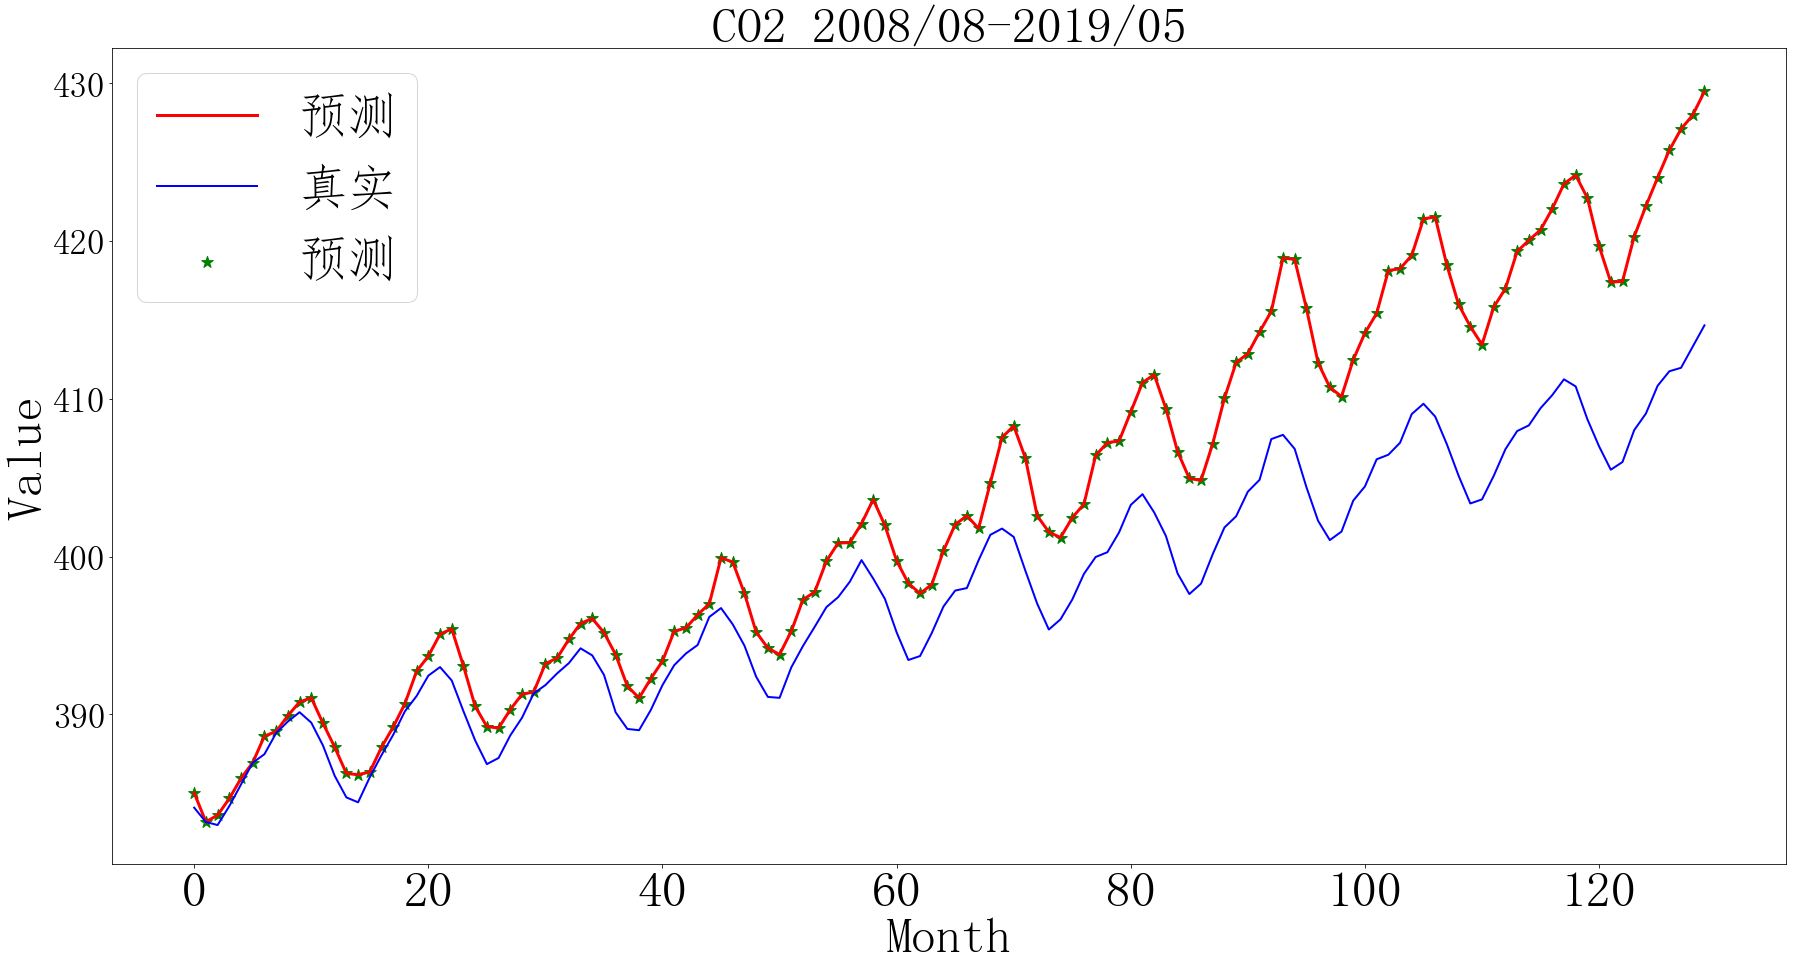

Test RMSE: 5.814


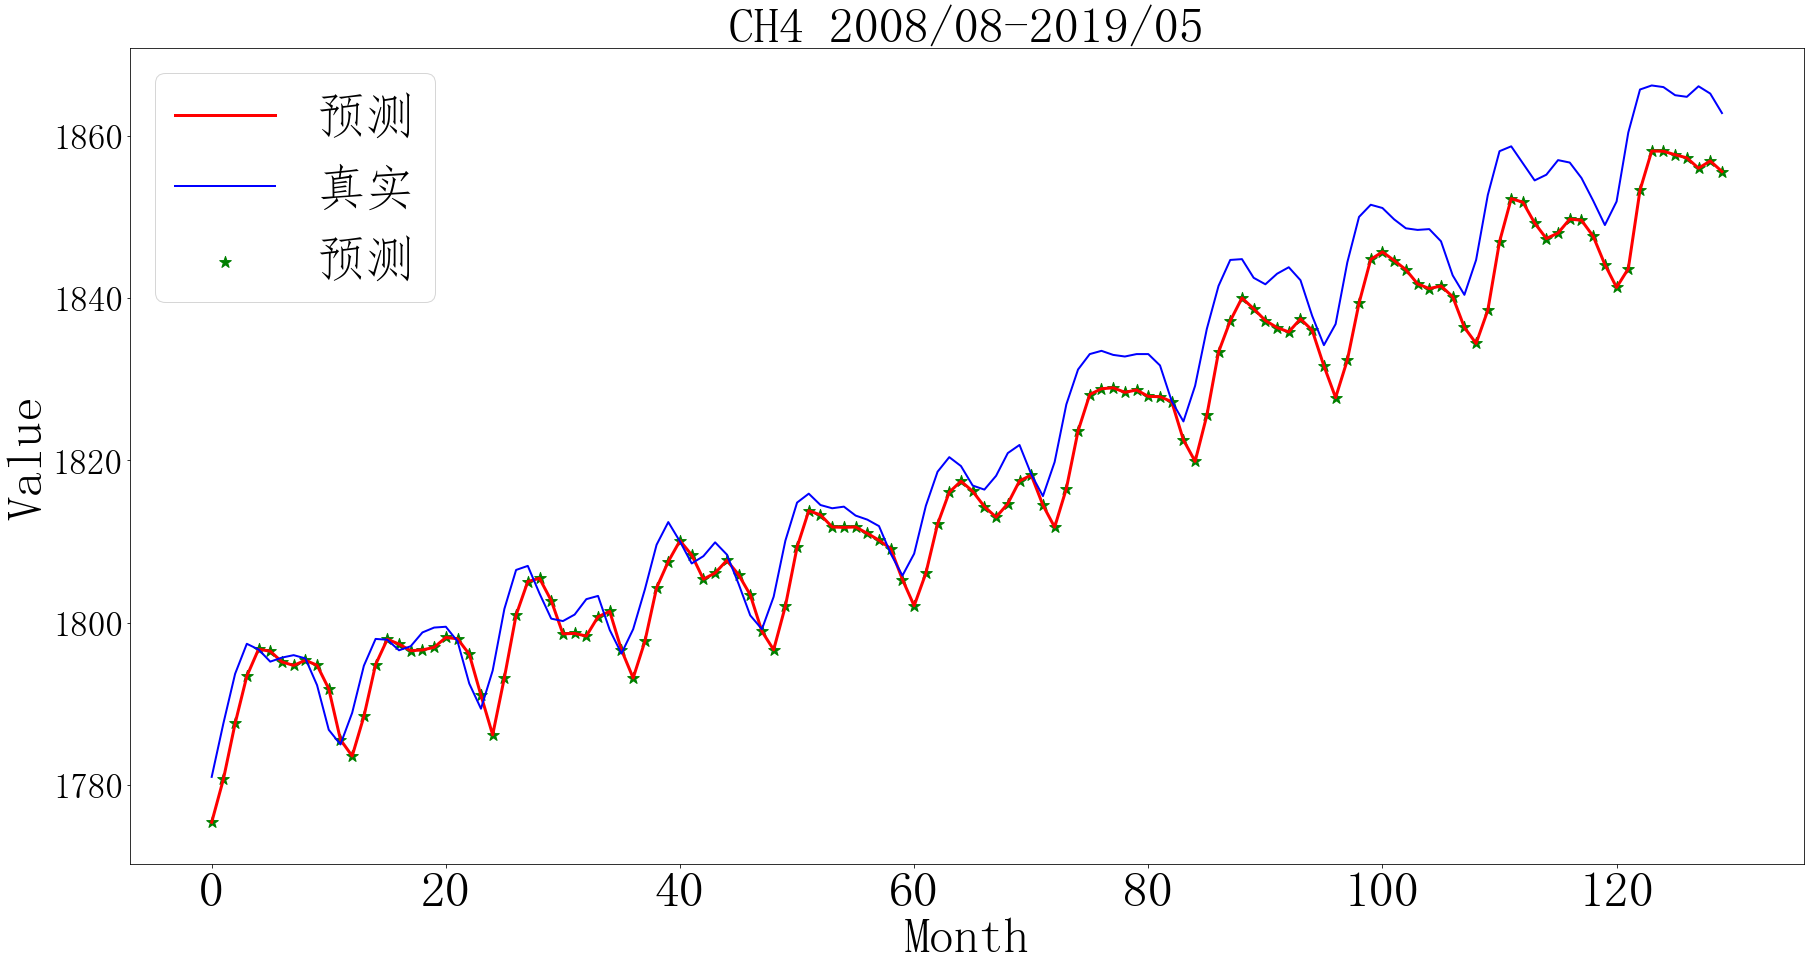

Test RMSE: 0.336


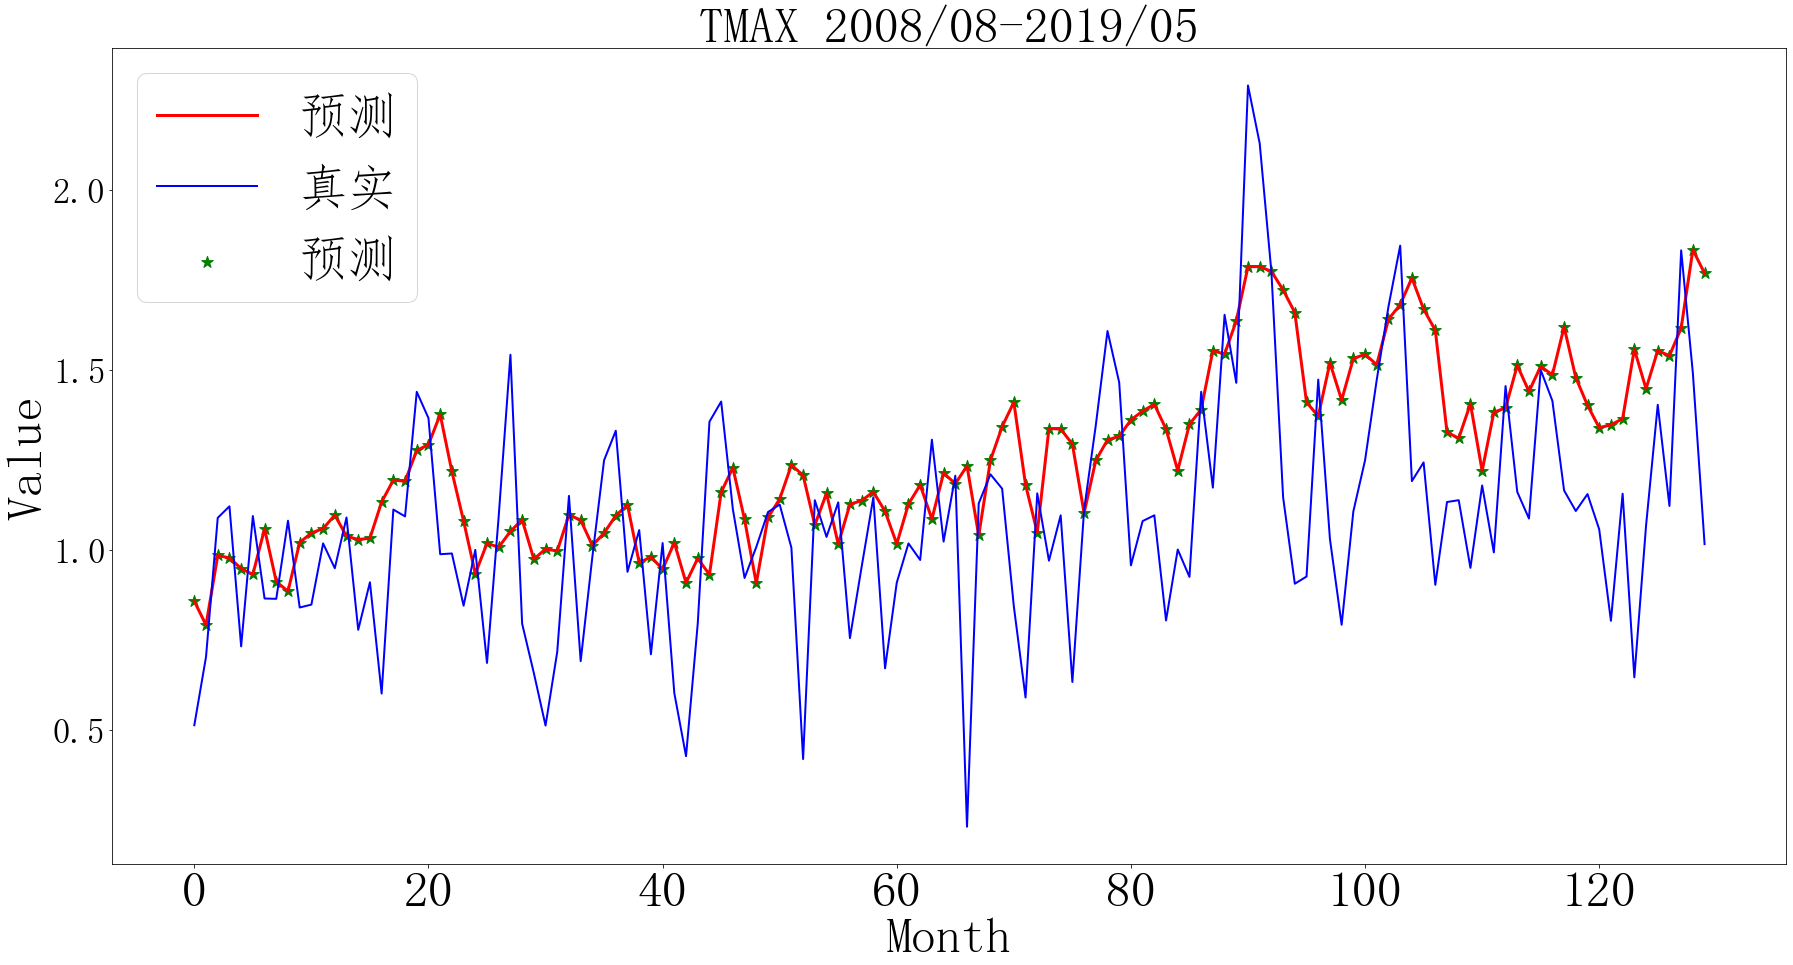

Test RMSE: 0.262


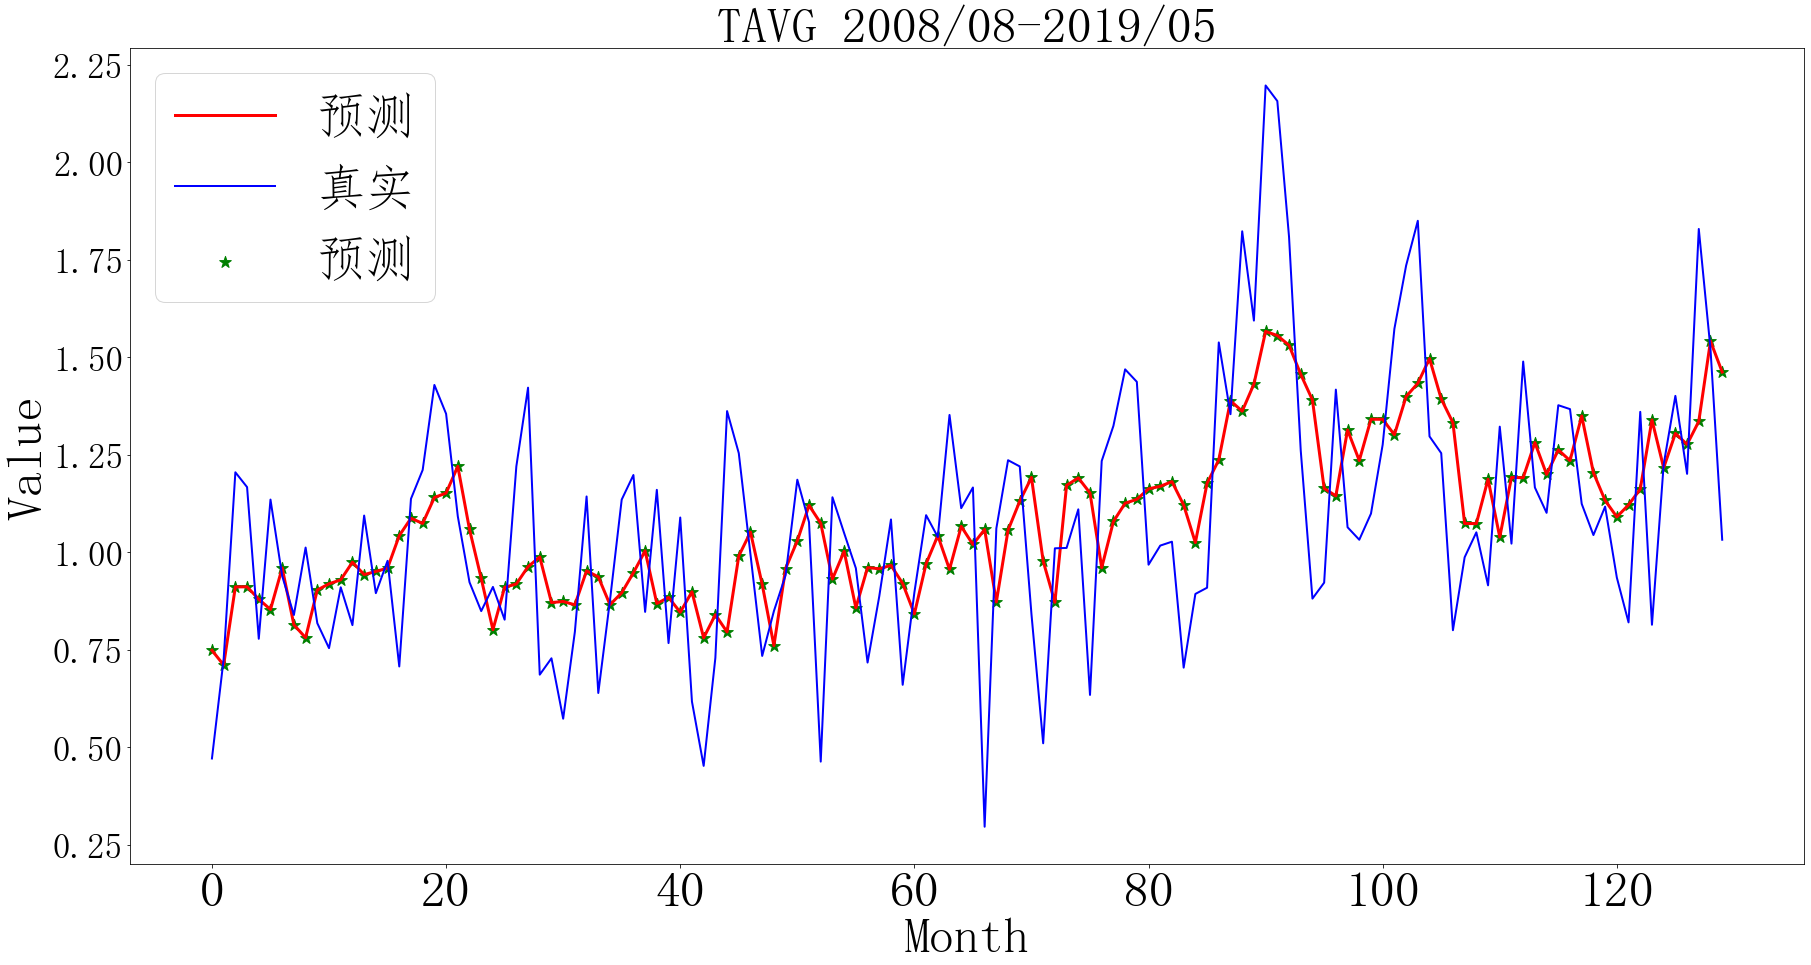

Test RMSE: 0.268


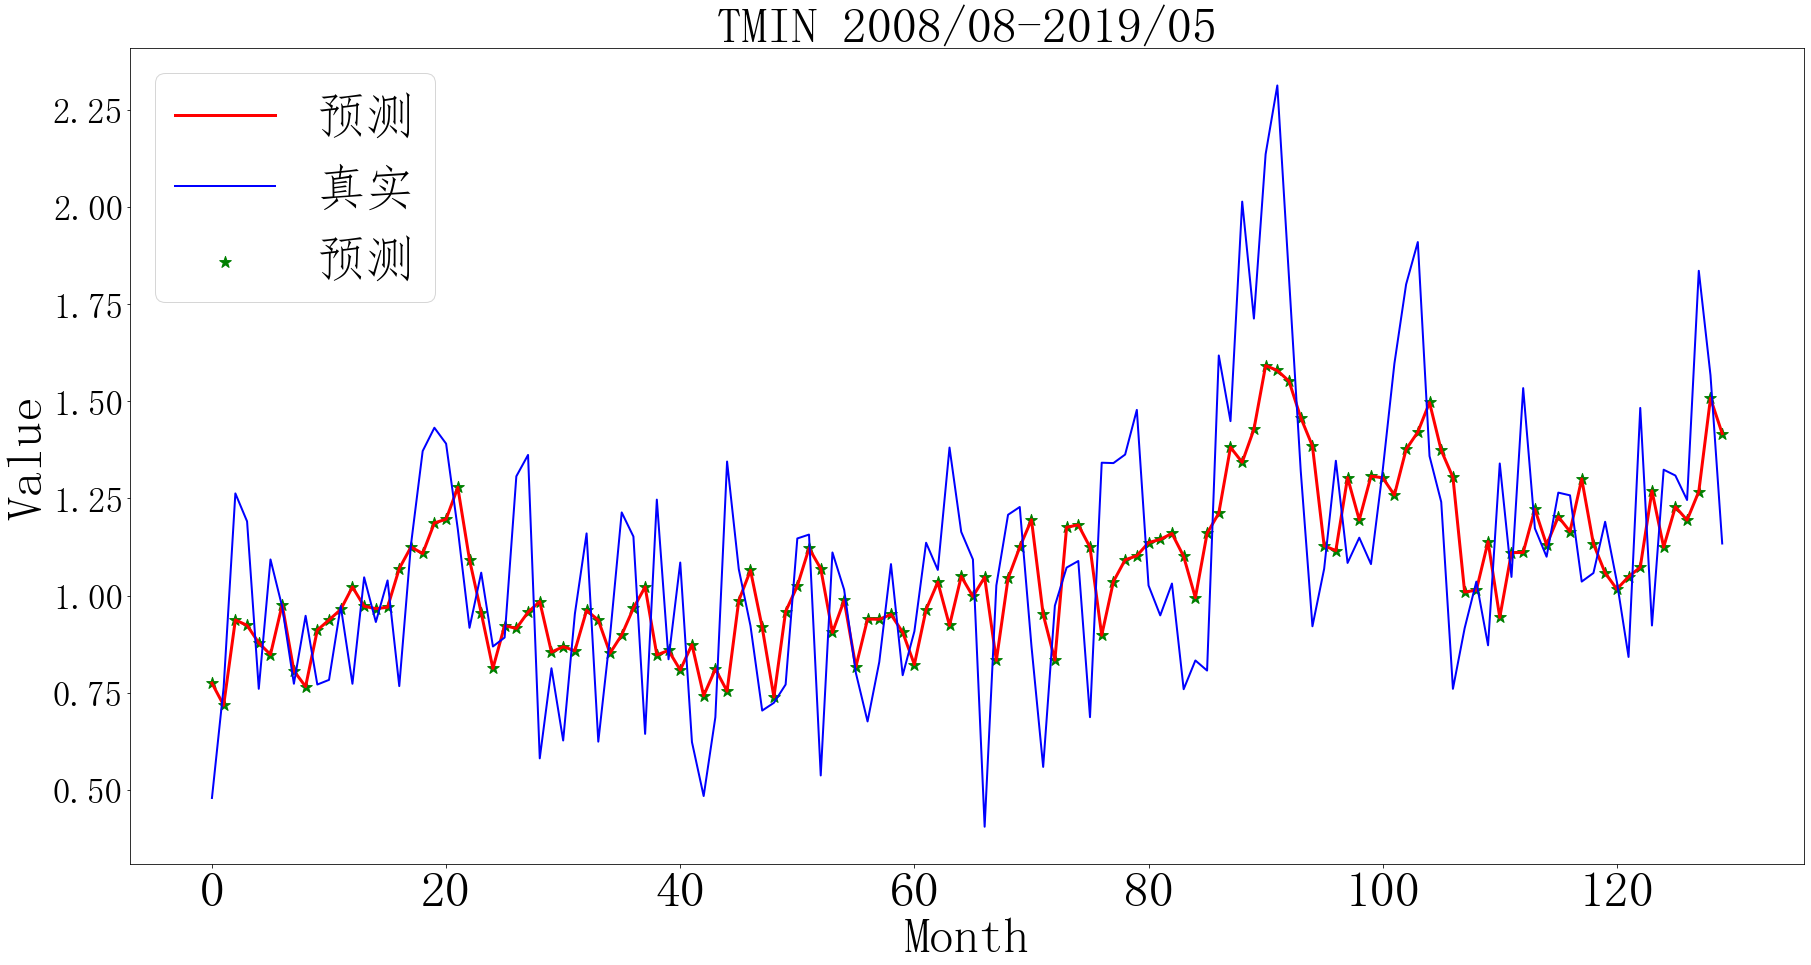

Test RMSE: 0.104


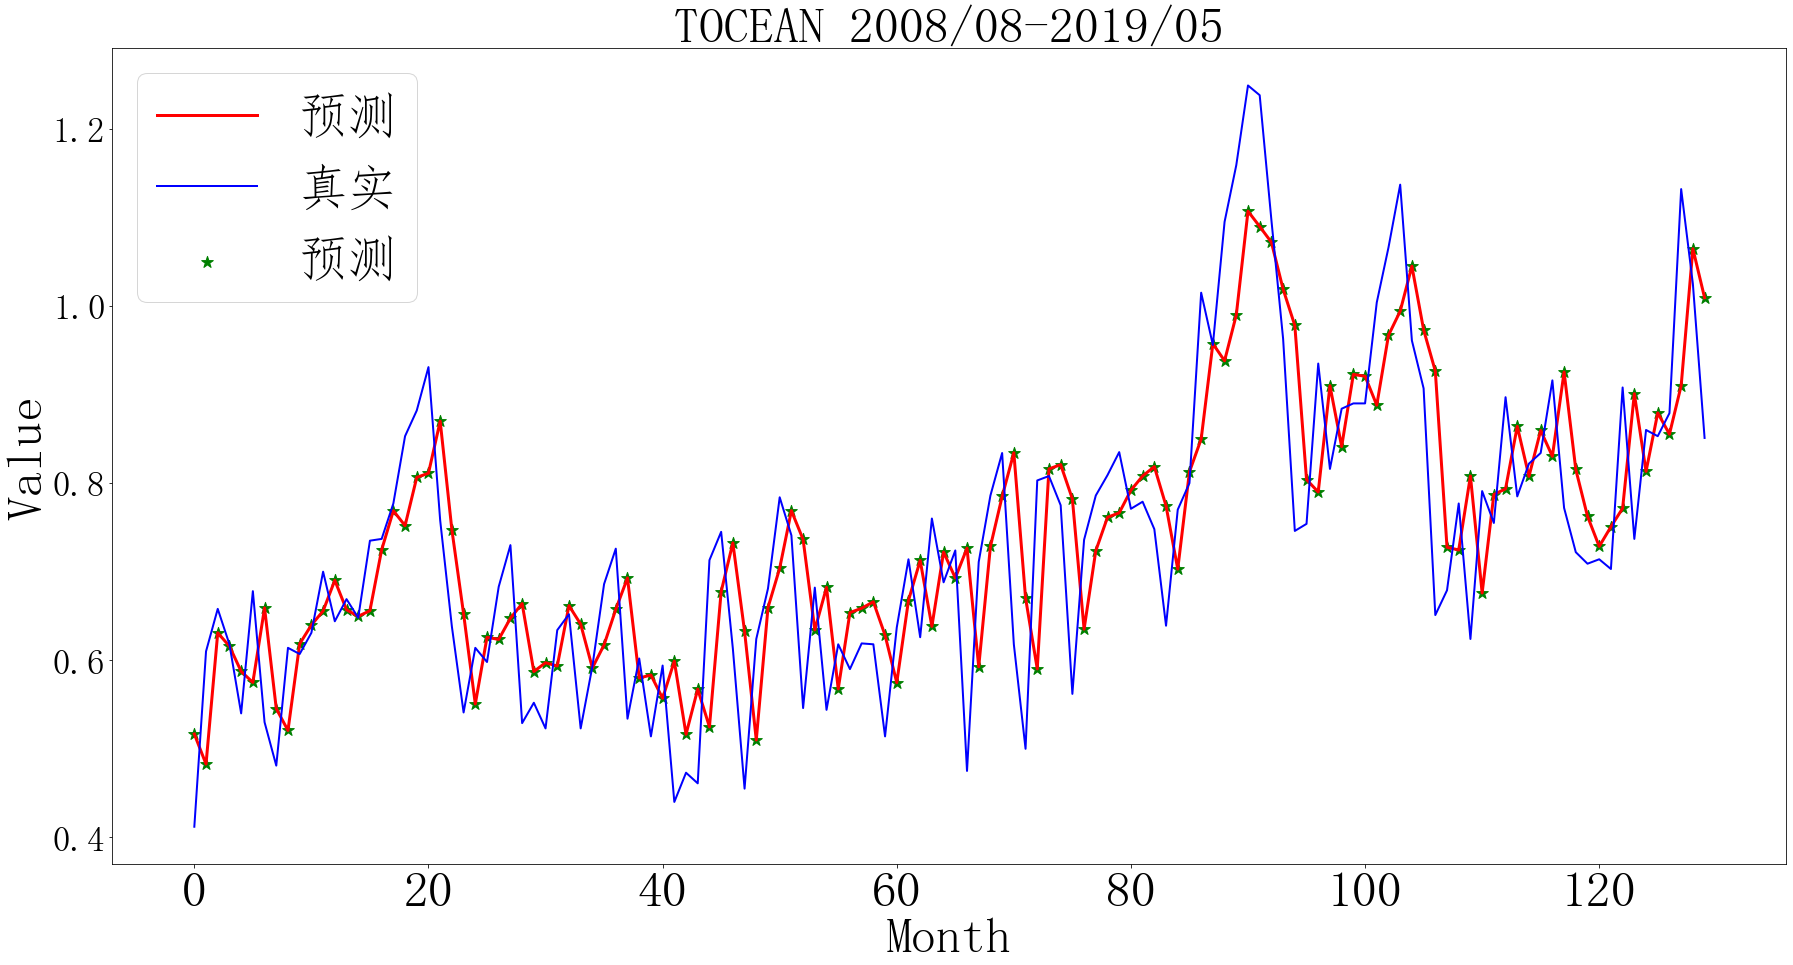

In [6]:
# 绘制历史数据和预测数据图
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

x=np.zeros((len(inv_yhat[:,0]),1))
for i in range(len(x)):
    x[i]=i
           
        
for i in groups:
    rmse = sqrt(mean_squared_error(inv_yhat[:,i-1], inv_y[:,i-1]))
    print('Test RMSE: %.3f' % rmse)

    fig= pyplot.figure(figsize = (30,15))
    plt.plot(inv_yhat[:,i-1],label='预测',c='r',linestyle='-',linewidth=3)
    plt.scatter(x,inv_yhat[:,i-1],label='预测',c='g',marker='*',s=150)
    plt.plot(inv_y[:,i-1],label="真实",c='b',linewidth=2,ms=5)
    
    plt.xticks(fontsize=50)
    plt.yticks(fontsize=35)
#     plt.title(fontsize=50)
    plt.legend(prop={'size':50})
    plt.title('{} 2008/08-2019/05'.format(dataset.columns[i]),fontsize=50)
    plt.xlabel("Month",fontsize=50)
    plt.ylabel("Value",fontsize=50)
    plt.savefig('{}verify.png'.format(dataset.columns[i]),dpi=200)
    
    plt.show()